In [23]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_07/best_maps/weighted_average_flipped_lesions/convergence_maps/optimized'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [24]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/redo2/conn/tmp/dataset_dict_prune.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

In [25]:
correlation = 'spearman'

In [26]:
from calvin_utils.ccm_utils.npy_utils import DataLoader
from calvin_utils.ccm_utils.stat_utils import CorrelationCalculator
data_loader = DataLoader(dict_path)
correlation_calculator = CorrelationCalculator(method=correlation, verbose=False)
corr_map_dict = correlation_calculator.generate_correlation_maps(data_loader)

Evaluating ANT DBS SANTE
Evaluating STN DBS
Evaluating ANT DBS Maastricht
Evaluating Epilepsy iEEG
Evaluating Alzheimer Disease
Evaluating Acute Stroke
Evaluating Multiple Sclerosis
Evaluating Penetrating TBI
Evaluating Parietal TMS Hebscher
Evaluating Parietal TMS Wang
Evaluating Parietal TMS Hermiller 2019a
Evaluating Parietal TMS Hermiller 2019b


Identify Datasets that Belong to Different Categories. 

Groups (values) allocate datasets to a fixed effect analysis. If no groups, set group_dict = {}
```
{
'dataset_1': 'group1',
'dataset_2': 'group2',
'dataset_3': 'group1'
}
```

In [27]:
corr_map_dict.keys()

dict_keys(['ANT DBS SANTE', 'STN DBS', 'ANT DBS Maastricht', 'Epilepsy iEEG', 'Alzheimer Disease', 'Acute Stroke', 'Multiple Sclerosis', 'Penetrating TBI', 'Parietal TMS Hebscher', 'Parietal TMS Wang', 'Parietal TMS Hermiller 2019a', 'Parietal TMS Hermiller 2019b'])

Print out datasets

In [28]:
group_dict = {}
    # 'ANT DBS SANTE' : 'DBS',
    # 'STN DBS' : 'DBS',
    # 'ANT DBS Maastricht' : 'DBS',
    # 'Epilepsy iEEG' : 'DBS',
    # 'Alzheimer Disease' : 'Lesion',
    # 'Acute Stroke' : 'Lesion',
    # 'Multiple Sclerosis' : 'Lesion',
    # 'Penetrating TBI' : 'Lesion',
    # 'Parietal TMS Wang' : 'TMS',
    # 'Parietal TMS Hermiller 2019a' : 'TMS',
    # 'Parietal TMS Hermiller 2019b' : 'TMS',
    # 'Parietal TMS Hebscher' : 'TMS'
    # }

# 02 - Use LOOCV to Train a Convergent Map on N-1 Datasets, Then Test it on the Nth dataset

Enter a list of datasets you want to flip (multiply correlation map by -1)
- This is typically done to control for sign inversion, enabling testing of topology specifically. 

In [29]:
datasets_to_flip = ['Alzheimer Disease', 'Acute Stroke', 'Multiple Sclerosis', 'Penetrating TBI'] #'fornix_memory', 'adni_Alzheimer', 'corbetta_memory', 'grafmann_memory', 'manitoba_memory', 'ms_memory', 'kim_tms', 'hebscher_tms']

Generate the Convergent Maps and Save the Individual Correlation Maps

In [30]:
from calvin_utils.ccm_utils.ccm_utils import LOOCVAnalyzer
loocv_analyzer = LOOCVAnalyzer(corr_map_dict, data_loader, 
                               similarity='spatial_correl',
                               optimizer=True,
                               method=correlation, n_bootstrap=1000, 
                               out_dir=out_dir,
                               weight=False,
                               mask_path='/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii',
                               roi_path=None,
                               datasets_to_flip=datasets_to_flip,
                               align_all_maps=False
                               )

Removing NaNS from self.coor_map_dict.


Generate Agreement Maps

In [31]:
loocv_analyzer.generate_and_save_maps(group_dict=group_dict, dir='convergence_maps/', verbose=True)

(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)
Removing NaNS from self.coor_map_dict.
===Imaging Optimizer Initialized===
Initializing: 
	 Weights: (1, 12)  
	 Training Maps: (12, 228483)
===        Training Data        ===
	 Training Dataset (For weighted average): ANT DBS SANTE
	 Training Dataset (For weighted average): STN DBS
	 Training Dataset (For weighted average): ANT DBS Maastricht
	 Training Dataset (For weighted average): Epilepsy iEEG
	 Training Dataset (For weighted average): Alzheimer Disease
	 Training Dataset (For weighted average): Acute Stroke
	 Training Dataset (For weighted average): Multiple Sclerosis
	 Training Dataset (For weighted average): Penetrating TBI
	 Training Dataset (For weighted average): Parietal TMS Hebscher
	 Training Dataset (For weighted average): Parietal TMS Wang
	 Training Dataset (For weighted average): Parietal TMS Hermiller 2019a
	 Training Dataset (For weighted average): Parietal TMS Hermiller 2019b
===         Testing Data

Loss: 0, 0/500: 0it [00:00, ?it/s]
Loss: 0.11010762160717737, 1/500: 0it [00:00, ?it/s]
Loss: 0.13306136586598358, 2/500: 0it [00:00, ?it/s]
Loss: 0.127211760062264, 3/500: 0it [00:00, ?it/s]
Loss: 0.1255433182575863, 4/500: 0it [00:00, ?it/s]
Loss: 0.12281106580042193, 5/500: 0it [00:00, ?it/s]
Loss: 0.12195094036076837, 6/500: 0it [00:00, ?it/s]
Loss: 0.1226415769655539, 7/500: 0it [00:00, ?it/s]
Loss: 0.12258078983706326, 8/500: 0it [00:00, ?it/s]
Loss: 0.12251377273658583, 9/500: 0it [00:00, ?it/s]
Loss: 0.13146245037977974, 10/500: 0it [00:00, ?it/s]
Loss: 0.12886297156663767, 11/500: 0it [00:00, ?it/s]
Loss: 0.12701069445031157, 12/500: 0it [00:00, ?it/s]
Loss: 0.1203457598529893, 13/500: 0it [00:00, ?it/s]
Loss: 0.12148566097442752, 14/500: 0it [00:00, ?it/s]
Loss: 0.12224298739510282, 15/500: 0it [00:00, ?it/s]
Loss: 0.1263202803248215, 16/500: 0it [00:00, ?it/s]
Loss: 0.12903376519663576, 17/500: 0it [00:00, ?it/s]
Loss: 0.13329210075749448, 18/500: 0it [00:00, ?it/s]
Loss: 0.

Max iterations reached: 500


Loss: -0.0760109247943592, 501/500: 0it [00:00, ?it/s]

(1, 228483) (902629,) (902629,)


Generate Group Level Maps

In [10]:
loocv_analyzer.save_individual_r_maps(dir='group_maps/', verbose=False)

(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)
(1, 228483) (902629,) (902629,)


Run LOOCV

Training on:  ['manitoba_memory', 'ms_memory', 'grafmann_memory', 'maastricth_memory', 'queensland_memory', 'sante_memory', 'kahana_random_stim', 'wang_tms', 'hebscher_tms', 'hermiller_tms_a1', 'hermiller_tms_b']
Testing on held-out datset:  corbetta_memory


<Figure size 432x432 with 0 Axes>

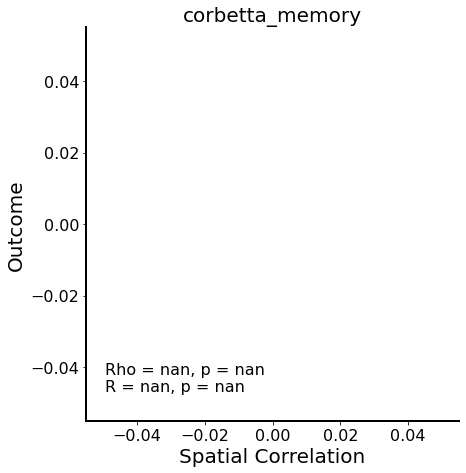

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 31693.64it/s]


Training on:  ['corbetta_memory', 'ms_memory', 'grafmann_memory', 'maastricth_memory', 'queensland_memory', 'sante_memory', 'kahana_random_stim', 'wang_tms', 'hebscher_tms', 'hermiller_tms_a1', 'hermiller_tms_b']
Testing on held-out datset:  manitoba_memory


<Figure size 432x432 with 0 Axes>

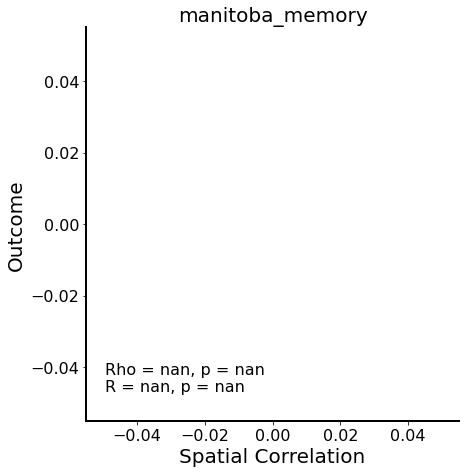

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 17870.84it/s]


Training on:  ['corbetta_memory', 'manitoba_memory', 'grafmann_memory', 'maastricth_memory', 'queensland_memory', 'sante_memory', 'kahana_random_stim', 'wang_tms', 'hebscher_tms', 'hermiller_tms_a1', 'hermiller_tms_b']
Testing on held-out datset:  ms_memory


<Figure size 432x432 with 0 Axes>

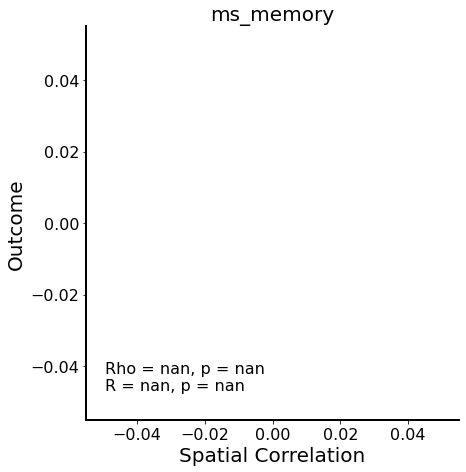

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 8018.75it/s]


Training on:  ['corbetta_memory', 'manitoba_memory', 'ms_memory', 'maastricth_memory', 'queensland_memory', 'sante_memory', 'kahana_random_stim', 'wang_tms', 'hebscher_tms', 'hermiller_tms_a1', 'hermiller_tms_b']
Testing on held-out datset:  grafmann_memory


<Figure size 432x432 with 0 Axes>

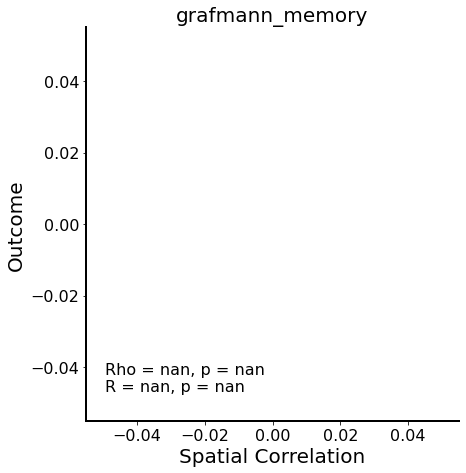

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 9900.12it/s]


Training on:  ['corbetta_memory', 'manitoba_memory', 'ms_memory', 'grafmann_memory', 'queensland_memory', 'sante_memory', 'kahana_random_stim', 'wang_tms', 'hebscher_tms', 'hermiller_tms_a1', 'hermiller_tms_b']
Testing on held-out datset:  maastricth_memory


<Figure size 432x432 with 0 Axes>

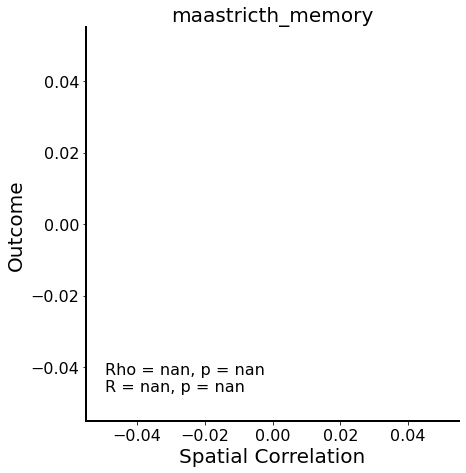

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 28983.80it/s]


Training on:  ['corbetta_memory', 'manitoba_memory', 'ms_memory', 'grafmann_memory', 'maastricth_memory', 'sante_memory', 'kahana_random_stim', 'wang_tms', 'hebscher_tms', 'hermiller_tms_a1', 'hermiller_tms_b']
Testing on held-out datset:  queensland_memory


<Figure size 432x432 with 0 Axes>

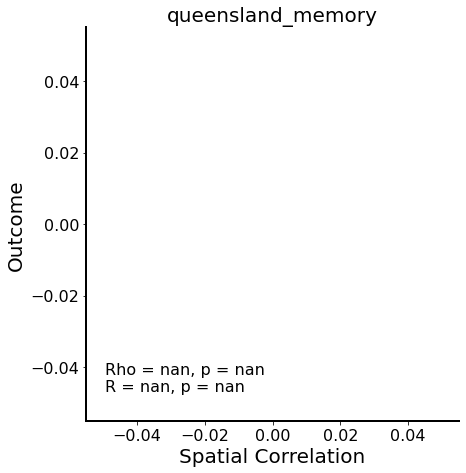

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 8656.87it/s]


Training on:  ['corbetta_memory', 'manitoba_memory', 'ms_memory', 'grafmann_memory', 'maastricth_memory', 'queensland_memory', 'kahana_random_stim', 'wang_tms', 'hebscher_tms', 'hermiller_tms_a1', 'hermiller_tms_b']
Testing on held-out datset:  sante_memory


<Figure size 432x432 with 0 Axes>

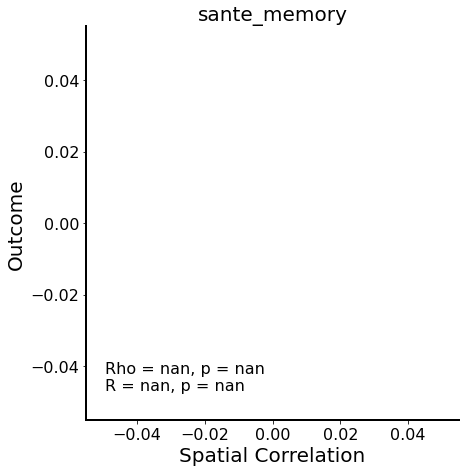

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 27151.82it/s]


Training on:  ['corbetta_memory', 'manitoba_memory', 'ms_memory', 'grafmann_memory', 'maastricth_memory', 'queensland_memory', 'sante_memory', 'wang_tms', 'hebscher_tms', 'hermiller_tms_a1', 'hermiller_tms_b']
Testing on held-out datset:  kahana_random_stim


<Figure size 432x432 with 0 Axes>

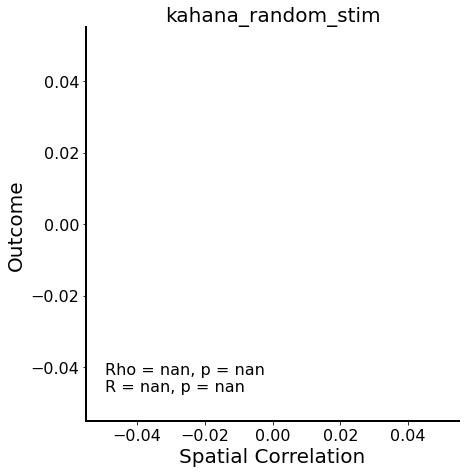

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 25311.11it/s]


Training on:  ['corbetta_memory', 'manitoba_memory', 'ms_memory', 'grafmann_memory', 'maastricth_memory', 'queensland_memory', 'sante_memory', 'kahana_random_stim', 'hebscher_tms', 'hermiller_tms_a1', 'hermiller_tms_b']
Testing on held-out datset:  wang_tms


<Figure size 432x432 with 0 Axes>

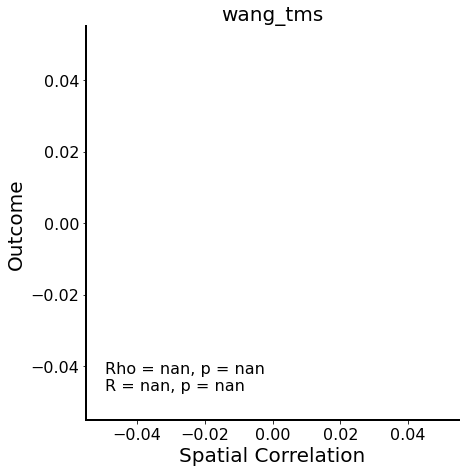

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 39100.80it/s]


Training on:  ['corbetta_memory', 'manitoba_memory', 'ms_memory', 'grafmann_memory', 'maastricth_memory', 'queensland_memory', 'sante_memory', 'kahana_random_stim', 'wang_tms', 'hermiller_tms_a1', 'hermiller_tms_b']
Testing on held-out datset:  hebscher_tms


<Figure size 432x432 with 0 Axes>

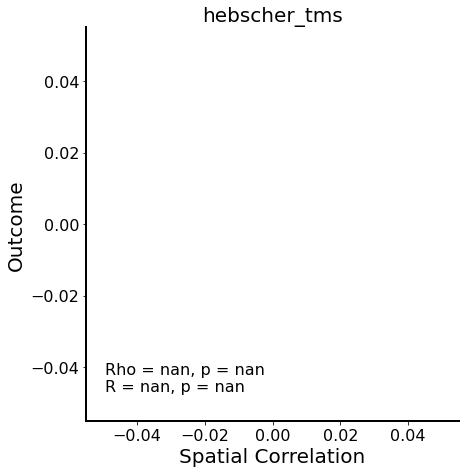

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 35962.17it/s]


Training on:  ['corbetta_memory', 'manitoba_memory', 'ms_memory', 'grafmann_memory', 'maastricth_memory', 'queensland_memory', 'sante_memory', 'kahana_random_stim', 'wang_tms', 'hebscher_tms', 'hermiller_tms_b']
Testing on held-out datset:  hermiller_tms_a1


<Figure size 432x432 with 0 Axes>

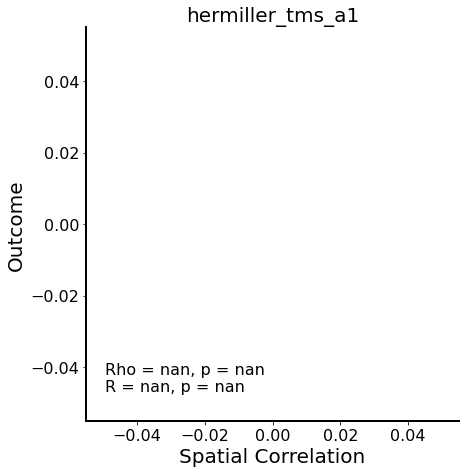

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 32438.04it/s]


Training on:  ['corbetta_memory', 'manitoba_memory', 'ms_memory', 'grafmann_memory', 'maastricth_memory', 'queensland_memory', 'sante_memory', 'kahana_random_stim', 'wang_tms', 'hebscher_tms', 'hermiller_tms_a1']
Testing on held-out datset:  hermiller_tms_b


<Figure size 432x432 with 0 Axes>

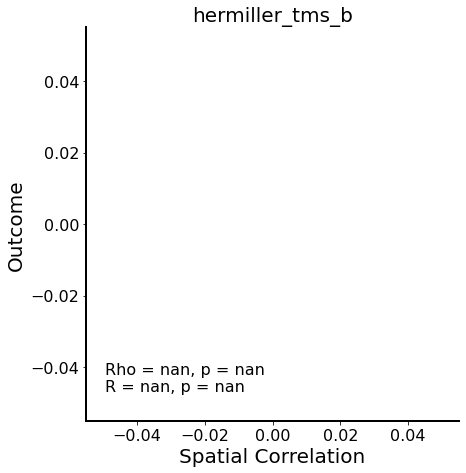

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 17138.85it/s]


,Dataset,CI Lower,CI Upper,Mean R
0,corbetta_memory,NaN,NaN,NaN
1,manitoba_memory,NaN,NaN,NaN
2,ms_memory,NaN,NaN,NaN
3,grafmann_memory,NaN,NaN,NaN
4,maastricth_memory,NaN,NaN,NaN
5,queensland_memory,NaN,NaN,NaN
6,sante_memory,NaN,NaN,NaN
7,kahana_random_stim,NaN,NaN,NaN
8,wang_tms,NaN,NaN,NaN
9,hebscher_tms,NaN,NaN,NaN


In [11]:
loocv_analyzer.run()
display(loocv_analyzer.results_df)

# 03 - Compute Fixed Effects

Run It

In [12]:
import pandas as pd
df = loocv_analyzer.compute_fixed_effects_by_group(group_dict)
meta_df = pd.concat([loocv_analyzer.results_df, df], ignore_index=True)
meta_df

,Dataset,CI Lower,CI Upper,Mean R
0,corbetta_memory,NaN,NaN,NaN
1,manitoba_memory,NaN,NaN,NaN
2,ms_memory,NaN,NaN,NaN
3,grafmann_memory,NaN,NaN,NaN
4,maastricth_memory,NaN,NaN,NaN
5,queensland_memory,NaN,NaN,NaN
6,sante_memory,NaN,NaN,NaN
7,kahana_random_stim,NaN,NaN,NaN
8,wang_tms,NaN,NaN,NaN
9,hebscher_tms,NaN,NaN,NaN


# 04 - Visualize Your Meta Analysis as a Forest Plot Figure 
- This is a meta-analysis. It presents the effect size (R/rho values) of your convergent map on the left-out map. 

Generate a Forest Plot of the Results

ValueError: Axis limits cannot be NaN or Inf

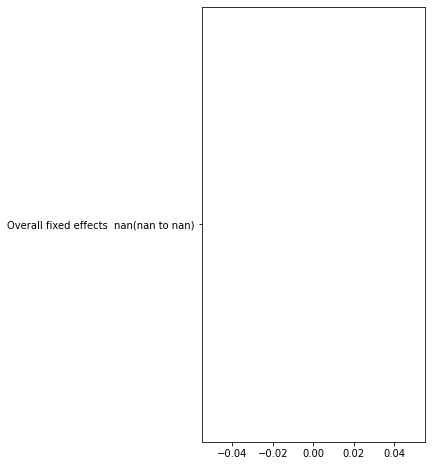

In [13]:
from calvin_utils.ccm_utils.stat_utils import MetaConvergenceForestPlot
meta_forest_plot = MetaConvergenceForestPlot(meta_df, sig_digits=2, out_dir=out_dir, table=True)
meta_forest_plot.run()

That's all

-Calvin